This notebook shows how the daily electrical energy consumption estimates were created from the data.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa

# create zero-filled data in memory
data_zf = {}
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    messages = wpa.load_message_file(vname + '-messages.csv')
    # zero filled data
    data_zf[vname] = wpa.insert_zeros_energy(energy_data, messages)

In [3]:
# Raw Data

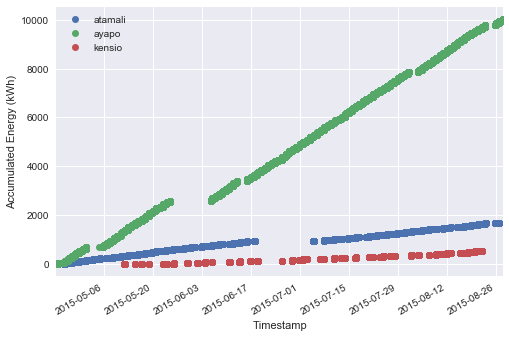

In [4]:
fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    energy_data['kWh export'].plot(ax=ax, label=vname, marker='o', linestyle='')
    
ax.set_ylabel('Accumulated Energy (kWh)')
plt.legend()
plt.show()

In [5]:
# Data with gap zeros inserted

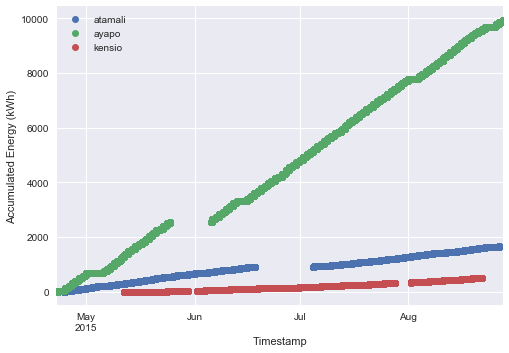

In [6]:
fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    data_zf[vname]['kWh export'].plot(ax=ax, label=vname, marker='o', linestyle='')
    
ax.set_ylabel('Accumulated Energy (kWh)')
plt.legend()
plt.show()

In [8]:
# mean on days with and without service

table_data = []
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    daily_energy = data_zf[vname]['kWh export'].diff().resample('D').sum()
    operating_daily_energy = daily_energy[daily_energy > 0]
    table_data.append({'village': vname,
                       'overall mean (kWh)': daily_energy.mean(),
                       'operating mean (kWh)': operating_daily_energy.mean(),
                       'per household operating mean (kWh)': operating_daily_energy.mean()/rfd['connections']})

table = pd.DataFrame(table_data)
table = table[['village', 'operating mean (kWh)', 'per household operating mean (kWh)']]

# export table for inclusion
import tabulate
with open('../tables/daily_operating_energy.md','w') as f:
    f.write(tabulate.tabulate(table, tablefmt='pipe', headers=table.columns))

table

,village,operating mean (kWh),per household operating mean (kWh)
0,atamali,15.212963,0.380324
1,ayapo,90.009091,0.873875
2,kensio,9.122807,0.456140


In [ ]:
# show result of the resample
# original plot

fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    messages = wpa.load_message_file(vname + '-messages.csv')
    resampled = energy_data['kWh export'].resample('T').asfreq().diff()
    resampled = resampled.resample('D').sum()
    resampled.plot(ax=ax, label=vname)

ax.set_ylabel('Daily Electrical Energy (kWh)')
plt.legend()
plt.show()

In [ ]:
# zerofilled daily energy plot
# note that nulls are replaced only when we have data

fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    resampled = data_zf[vname]['kWh export'].resample('T').asfreq().diff()
    resampled = resampled.resample('D').sum()
    resampled.plot(ax=ax, label=vname)

ax.set_ylabel('Daily Electrical Energy (kWh)')
plt.legend()
plt.show()

In [ ]:
# cumulative distribution function

fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:5]:
    vname = rfd['village_name']
    resampled = data_zf[vname]['kWh export'].resample('T').asfreq().diff()
    resampled = resampled.resample('D').sum()
    resampled = resampled.dropna()
    sns.distplot(resampled, 
                 hist_kws={'cumulative':True,
                           'histtype':'step',
                           'linewidth':2},
                kde=False,
                norm_hist=True,
                bins=100,
                label=vname,
                ax=ax)    
    
plt.legend()
plt.savefig('../plots/daily_energy_CDF.png')
plt.show()

In [ ]:
# table of descriptive statistics?